# データ分析演習 week08 演習課題
- 氏名： 氏名に置き換えてください
- 学生番号： 学生番号に置き換えてください

## はじめに
1. このファイルの名前の(JBxxxxxx)を自分の学生番号にしてください．
2. 上記の氏名と学生番号を忘れずに記入してください．

## 提出方法
- GitHub Desktopを通じてGitHubへ提出
- 締切: **6月25日（木）**

## この演習資料の進め方
1. これまでの復習（特に，pandasとmatplotlib）+ $\alpha$ の内容となっています．　ところどころ`[ここにコードを書く]`と書いていますので，上から実行しながら，コードを修正しセルを完成していってください．教科書の2章も参照してください．
2. 早く終わった人は， report3 に取り組んでください．

## この演習資料の目的
- 実際のデータに対して，これまで習ったpandasの機能を用いることで，各種統計量の確認や年や月といったグループごとの統計量の確認が簡単にできることを知る
- pandasとmatplotlibを組みあわせてデータを可視化することで， いろいろな観点からの可視化が簡単にできることを知る
---

はじめに，本日の演習で使うモジュールをインポートしておきます．以下のセルを実行してください．

In [1]:
# pandas の読み込み
import pandas as pd

# Matplotlib と Seabornの読み込み
import matplotlib as mpl
import seaborn as sns
sns.set()

# pyplotにはpltの別名で実行できるようにする
import matplotlib.pyplot as plt

# Jupyter Notebook上でグラフを表示させるために必要なマジックコマンド
%matplotlib inline

In [2]:
pd.set_option("display.precision", 3) # pandasのDataFrameやSeries中の値を表示するときに小数点第3位までの表示にする

In [3]:
# numpyなどの出力を小数第3位まで表示
%precision 3

'%.3f'

# csvファイルをDataFrameとして読み込む

これまでの演習では，DataFrameを作成する際に，データを辞書（dict）としてコード中に記述することでDataFrameの作成を行っていましたが，実際の分析ではそのようにコード中にデータを記述することはあまりません． pandasにはcsvやExcelなどのファイルからデータを読み込んでDataFrameを作成してくれる関数が用意されています． 

今週の演習課題のリポジトリの中に，今回使うデータが`week08data.csv`というファイル名のCSVファイルとして入っています．これを読み込んでみます． csvファイルを読み込みには，`pd.read_csv()`関数を使用します．

In [4]:
df = pd.read_csv("week08data.csv", parse_dates=[0], index_col=0) # csvファイルを読み込みDataFrameを作成し， df に代入する
df # df の中身を表示する．

,year,month,rice,bread,noodle,fish_faw,fish_salt,fish_processed,beef,pork,...,castella,cake,jelly,pudding,senbei,biscuit,snack,candy,chocolate,icecream
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,2010,1,1815,2255,1369,3992,1140,718,1579,2002,...,82,610,56,125,449,229,320,205,456,362
2010-02-01,2010,2,1980,2231,1281,3720,1089,660,1361,1943,...,63,545,69,123,411,239,317,191,1122,305
2010-03-01,2010,3,2248,2518,1447,4139,1275,701,1517,2009,...,86,657,98,138,509,396,364,214,409,383
2010-04-01,2010,4,2259,2468,1364,3818,1181,662,1462,1923,...,81,522,127,132,466,261,358,199,287,464
2010-05-01,2010,5,2282,2507,1504,3973,1218,660,1575,1977,...,90,551,182,139,446,271,360,195,233,752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,2019,8,1756,2657,1656,3219,1070,590,1853,2335,...,72,429,424,139,539,379,420,161,278,1513
2019-09-01,2019,9,2335,2552,1339,3160,1032,599,1560,2438,...,56,489,173,122,424,323,385,157,374,996
2019-10-01,2019,10,2944,2650,1446,3233,1056,688,1522,2555,...,58,508,114,130,434,307,397,190,478,724


`pd.read_csv("week08data.csv", parse_dates=[0], )` は `week08data.csv` をDataFrameとして読み込む，という意味です． `index_col=0` はcsvの0列目をインデックス名として使用する，という意味で，  `parse_dates=[0]` は 0列目のデータを時系列情報として読み込む，という意味です．

これで csv ファイルを読みこむことができました．データ自体の出典は講義資料を参考にしてください． 二人以上の世帯を対象にした，2010年〜2019年の10年間のさまざまな品目における毎月の消費金額（円）に関するデータとなっています．`year`と`month`の列はそれぞれデータの年と月を表します．
- なお，実は`year`や`month`という列を用意する必要はなく，インデックス列の情報を使えば本演習で行っているような特定の年や月ごとに値を集計することはできるのですが，今回は話を単純にするため，年や月を表す列を明示的に加えています． 

`rice`以降の列は各品目を表します． ラベル名を英語に修正しています．英語ともとの日本語のラベル名の対応は下記のようになっています．

In [5]:
pd.read_excel("label_info.xlsx") # 対応表を表示

,Japanese,English
0,1.1.1 米【円】,rice
1,1.1.2 パン【円】,bread
2,1.1.3 麺類【円】,noodle
3,1.2.1 生鮮魚介【円】,fish_faw
4,1.2.2 塩干魚介【円】,fish_salt
5,1.2.3 魚肉練製品【円】,fish_processed
6,220 牛肉【円】,beef
7,221 豚肉【円】,pork
8,222 鶏肉【円】,chiken
9,225 ハム【円】,ham


たとえば，　`df` の `0`行`rice`列の値`1815`は，2010年1月における，二人以上の世帯の米の消費金額が1,980円である，ということを表しています．

---

さて，ここからは実際にpandasやmatplotlibを使ってデータを分析していきます． ところどころ穴抜けになっていますので，修正しながらセルを実行していってください．

# パート1: pandasでデータを分析する

## 1-1 平均を調べる

まずは，10年間の120ヶ月分全てのデータにおける，各品目の消費金額の平均について計算してみましょう．

たとえば， 米（`rice`）の10年間の消費金額の平均を計算したければ

In [6]:
df["rice"].mean() # rice 列の平均を求める

2130.667

として求められます． 一方， DataFrameでは列を指定せず `df.mean()`とするだけで，全ての量的データに対して平均を求めることができました．

In [7]:
df.mean() #全ての量的データに対して平均を求める

year               2014.500
month                 6.500
rice               2130.667
bread              2462.000
noodle             1467.058
fish_faw           3729.608
fish_salt          1202.158
fish_processed      723.817
beef               1703.508
pork               2287.633
chiken             1196.850
ham                 458.792
sausage             607.525
bacon               209.450
milk               1281.517
dairy              1552.342
egg                 741.917
cabbage             235.458
spinach             177.458
chinese_cabbage     109.350
green_onion         251.492
broccoli            162.625
bean_sprouts         87.200
potato              213.400
radish              149.250
carrot              202.708
onion               269.525
bambooshot           64.250
eggplant            158.733
tomato              623.433
green_pepper        163.683
apple               409.042
mikan               369.242
orange               52.667
pear                156.158
yokan               

これで各品目の平均消費金額が求められたのですが， `year` や `month` の列についても平均が求められていることが分かります．これは，データの読み込み時に `year` や `month` についても pandasが量的データであると認識しているからです． 

次週の先取りになりますが，現在のDataFrameのインデックスや各列がどのような型として認識されているかを確認するには， `info()`という関数を使います．

In [8]:
df.info() # 変数 df に入っているDataFrameの情報を表示する 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2010-01-01 to 2019-12-01
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   year             120 non-null    int64
 1   month            120 non-null    int64
 2   rice             120 non-null    int64
 3   bread            120 non-null    int64
 4   noodle           120 non-null    int64
 5   fish_faw         120 non-null    int64
 6   fish_salt        120 non-null    int64
 7   fish_processed   120 non-null    int64
 8   beef             120 non-null    int64
 9   pork             120 non-null    int64
 10  chiken           120 non-null    int64
 11  ham              120 non-null    int64
 12  sausage          120 non-null    int64
 13  bacon            120 non-null    int64
 14  milk             120 non-null    int64
 15  dairy            120 non-null    int64
 16  egg              120 non-null    int64
 17  cabbage          120 non-null    in

たとえば ` 0   year         120 non-null    int64  ` という情報は，  `year` の列は `int64`型 のデータ（すなわち，整数のデータ）であり， 欠損値ではない120個のデータがある，ということを表しています． 実際，10年間のデータですので， 10 x 12ヶ月 = 120ヶ月分のデータがあります．

さて， `df.mean()` としてしまうと， `year` や `month` まで平均を求められてしまうので， 各品目だけに絞って平均を求めてみます．

In [9]:
df[['rice',  'bread',  'noodle',  'fish_faw',  'fish_salt',  'fish_processed',  'beef',  'pork',  'chiken',  
 'ham',  'sausage',  'bacon',  'milk',  'dairy',  'egg',  'cabbage',  'spinach',  'chinese_cabbage',  
 'green_onion',  'broccoli',  'bean_sprouts',  'potato',  'radish',  'carrot',  'onion',  'bambooshot', 
 'eggplant',  'tomato',  'green_pepper',  'apple',  'mikan',  'orange',  'pear',  'yokan',  'manju',  'castella',  
 'cake',  'jelly',  'pudding',  'senbei',  'biscuit',  'snack',  'candy',  'chocolate',  'icecream']].mean() # 品目だけ平均を計算する

rice               2130.667
bread              2462.000
noodle             1467.058
fish_faw           3729.608
fish_salt          1202.158
fish_processed      723.817
beef               1703.508
pork               2287.633
chiken             1196.850
ham                 458.792
sausage             607.525
bacon               209.450
milk               1281.517
dairy              1552.342
egg                 741.917
cabbage             235.458
spinach             177.458
chinese_cabbage     109.350
green_onion         251.492
broccoli            162.625
bean_sprouts         87.200
potato              213.400
radish              149.250
carrot              202.708
onion               269.525
bambooshot           64.250
eggplant            158.733
tomato              623.433
green_pepper        163.683
apple               409.042
mikan               369.242
orange               52.667
pear                156.158
yokan                60.942
manju               111.867
castella            

なお，  year と month を省いて平均を求める別の方法としては `drop()` を使う方法もあります． `df.drop(["year", "month"], axis=1)` とすると， `year`列と`month`列を削除したDataFrameを作ることができますので，そのDataFrameに対して全ての量的データに対して平均を求めてやれば，先ほどと同じ結果になります．

In [10]:
df.drop(["year", "month"], axis=1).mean() # year列とmonth列を削除したDataFrameに対して各列の平均を求める

rice               2130.667
bread              2462.000
noodle             1467.058
fish_faw           3729.608
fish_salt          1202.158
fish_processed      723.817
beef               1703.508
pork               2287.633
chiken             1196.850
ham                 458.792
sausage             607.525
bacon               209.450
milk               1281.517
dairy              1552.342
egg                 741.917
cabbage             235.458
spinach             177.458
chinese_cabbage     109.350
green_onion         251.492
broccoli            162.625
bean_sprouts         87.200
potato              213.400
radish              149.250
carrot              202.708
onion               269.525
bambooshot           64.250
eggplant            158.733
tomato              623.433
green_pepper        163.683
apple               409.042
mikan               369.242
orange               52.667
pear                156.158
yokan                60.942
manju               111.867
castella            

さて，　

の用に，毎回こんなに大量のカラムをコードとして書くのは面倒なので，品目を表した配列を定義しておきました．

In [11]:
products = ['rice',  'bread',  'noodle',  'fish_faw',  'fish_salt',  'fish_processed',  'beef',  'pork',  'chiken',  
 'ham',  'sausage',  'bacon',  'milk',  'dairy',  'egg',  'cabbage',  'spinach',  'chinese_cabbage',  
 'green_onion',  'broccoli',  'bean_sprouts',  'potato',  'radish',  'carrot',  'onion',  'bambooshot', 
 'eggplant',  'tomato',  'green_pepper',  'apple',  'mikan',  'orange',  'pear',  'yokan',  'manju',  'castella',  
 'cake',  'jelly',  'pudding',  'senbei',  'biscuit',  'snack',  'candy',  'chocolate',  'icecream']

この変数を用いれば，全ての品目の平均を求めるのは下記のコードで書けます．

In [12]:
df[products].mean() # 品目についてだけ平均を計算する

rice               2130.667
bread              2462.000
noodle             1467.058
fish_faw           3729.608
fish_salt          1202.158
fish_processed      723.817
beef               1703.508
pork               2287.633
chiken             1196.850
ham                 458.792
sausage             607.525
bacon               209.450
milk               1281.517
dairy              1552.342
egg                 741.917
cabbage             235.458
spinach             177.458
chinese_cabbage     109.350
green_onion         251.492
broccoli            162.625
bean_sprouts         87.200
potato              213.400
radish              149.250
carrot              202.708
onion               269.525
bambooshot           64.250
eggplant            158.733
tomato              623.433
green_pepper        163.683
apple               409.042
mikan               369.242
orange               52.667
pear                156.158
yokan                60.942
manju               111.867
castella            

（参考） なお，  配列 `products` を定義するのに今は全てのラベル名を直接コードに書きましたが，本来はそのようにコード中に，今後変わるかもしれないデータを記載するのは好ましくありません．例えば，データに新しく品目を追加したら，上記の `products`の定義のコードを修正する必要がでてしまいます．

より良い方法として，下記のように， ラベル一覧を記したファイル`label_info.xlsx`から全ラベル名を読みこむことでも `products`　を作ることができます．

In [13]:
df_labels = pd.read_excel("label_info.xlsx")  # ラベルの対応表を読み込む
products = df_labels["English"].values.tolist() # English列の全文字列を配列として products に代入する
products # products の中身を表示

['rice',
 'bread',
 'noodle',
 'fish_faw',
 'fish_salt',
 'fish_processed',
 'beef',
 'pork',
 'chiken',
 'ham',
 'sausage',
 'bacon',
 'milk',
 'dairy',
 'egg',
 'cabbage',
 'spinach',
 'chinese_cabbage',
 'green_onion',
 'broccoli',
 'bean_sprouts',
 'potato',
 'radish',
 'carrot',
 'onion',
 'bambooshot',
 'eggplant',
 'tomato',
 'green_pepper',
 'apple',
 'mikan',
 'orange',
 'pear',
 'yokan',
 'manju',
 'castella',
 'cake',
 'jelly',
 'pudding',
 'senbei',
 'biscuit',
 'snack',
 'candy',
 'chocolate',
 'icecream']

## 1-2 平均以外の統計量を調べる

これも次週の先取りになりますが， 平均以外の統計量（最大値，中央値，標準偏差など・・・）を手軽に知る方法として， `describe()`という関数があります．

In [14]:
df[products].describe()

,rice,bread,noodle,fish_faw,fish_salt,fish_processed,beef,pork,chiken,ham,...,castella,cake,jelly,pudding,senbei,biscuit,snack,candy,chocolate,icecream
count,120.000,120.000,120.000,120.000,120.000,120.000,120.000,120.000,120.000,120.000,...,120.000,120.000,120.000,120.000,120.000,120.000,120.000,120.000,120.000,120.000
mean,2130.667,2462.000,1467.058,3729.608,1202.158,723.817,1703.508,2287.633,1196.850,458.792,...,73.833,572.317,171.542,123.792,464.442,298.417,362.208,181.092,452.867,709.617
std,458.461,151.977,198.848,730.558,271.002,269.395,370.980,244.232,170.962,186.231,...,14.252,246.447,106.869,8.205,71.393,52.285,33.097,20.565,289.441,335.627
min,1349.000,2192.000,1194.000,2977.000,980.000,545.000,1337.000,1860.000,877.000,290.000,...,50.000,384.000,56.000,101.000,356.000,216.000,302.000,136.000,134.000,274.000
25%,1810.000,2346.500,1317.750,3379.250,1077.750,609.750,1508.500,2039.250,1070.750,345.750,...,64.000,454.750,86.750,118.000,419.000,261.000,332.750,163.000,273.500,453.000
50%,2030.000,2470.500,1381.000,3533.500,1130.500,642.000,1626.500,2349.500,1184.500,388.000,...,71.000,508.500,130.500,123.000,446.500,286.000,361.000,183.500,386.000,594.500
75%,2305.250,2557.250,1617.250,3722.000,1190.000,696.000,1735.500,2484.250,1299.000,498.000,...,82.250,549.500,239.250,129.000,490.250,323.000,382.250,196.250,519.500,891.000
max,3859.000,2898.000,2058.000,6420.000,2314.000,1690.000,3107.000,2771.000,1728.000,1147.000,...,110.000,1390.000,424.000,143.000,711.000,453.000,464.000,231.000,1405.000,1513.000


簡単に項目をかいつまんで説明すると，
- **count**: データの個数
- **mean**: 平均
- **std**: （不偏）標準偏差 （$n-1$で割る方の分散の平方根）
- **25%**: 第1四分位数
- **50%**: 中央値

です． 各変数のいろいろな統計量を知りたいときに便利な関数です．

たとえば， 米（`rice`）とパン（`bread`）と麺類（`noodle`）の各種統計量だけ知りたければ，

In [15]:
df[["rice", "bread", "noodle"]].describe()

,rice,bread,noodle
count,120.000,120.000,120.000
mean,2130.667,2462.000,1467.058
std,458.461,151.977,198.848
min,1349.000,2192.000,1194.000
25%,1810.000,2346.500,1317.750
50%,2030.000,2470.500,1381.000
75%,2305.250,2557.250,1617.250
max,3859.000,2898.000,2058.000


とすれば求まりますね． 10年間の各月の消費金額の平均をみると，この3つのなかで最も消費金額が多い品目はパンであることが分かりますね．

##  1-3 いろいろな条件で消費金額を調べる

### 1-3-1 特定の年（2010年）における各品目の毎月の消費金額の平均を計算する

week06（教科書ch.2.4）で見たように，pandasでは特定の条件にマッチした行だけを抽出することが簡単にできます．

先ほどは10年間全てのデータに対して平均を求めましたが，ここでは，2010年のデータだけを対象に平均を見てみましょう． まず， 変数 `df` から 2010年のデータだけを抽出し， `df_2010`という変数に代入してみます．  `year`列にデータの年が入っていますので，この列に対して条件を書けば良いですね．教科書 ch2.4.5も参照してください．

In [16]:
df_2010 = df[df["year"] == 2010] # yearが2010の行だけ抽出し df_2010 に格納する
df_2010 # df_2010 の中身を表示

,year,month,rice,bread,noodle,fish_faw,fish_salt,fish_processed,beef,pork,...,castella,cake,jelly,pudding,senbei,biscuit,snack,candy,chocolate,icecream
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,2010,1,1815,2255,1369,3992,1140,718,1579,2002,...,82,610,56,125,449,229,320,205,456,362
2010-02-01,2010,2,1980,2231,1281,3720,1089,660,1361,1943,...,63,545,69,123,411,239,317,191,1122,305
2010-03-01,2010,3,2248,2518,1447,4139,1275,701,1517,2009,...,86,657,98,138,509,396,364,214,409,383
2010-04-01,2010,4,2259,2468,1364,3818,1181,662,1462,1923,...,81,522,127,132,466,261,358,199,287,464
2010-05-01,2010,5,2282,2507,1504,3973,1218,660,1575,1977,...,90,551,182,139,446,271,360,195,233,752
2010-06-01,2010,6,2285,2402,1612,3674,1152,602,1349,1872,...,65,439,267,137,388,257,325,165,220,841
2010-07-01,2010,7,2183,2365,1895,3518,1203,603,1504,1909,...,64,415,368,128,401,259,316,163,149,1211
2010-08-01,2010,8,2114,2250,1680,3772,1164,607,1606,1953,...,68,462,374,133,437,262,322,162,134,1451
2010-09-01,2010,9,2927,2237,1280,3697,1069,642,1442,1973,...,59,447,144,125,372,226,317,162,209,864


2010年のデータだけを取得できましたので，あとはこのデータに対して平均を求めるだけですね． やはり `year` と `month` の列まで含まれてしまってますので， 変数 `products`　を使って列を絞り込んでから平均を求めましょう．

In [17]:
df_2010[products].mean() # 全ての品目に対して2010年の平均を求める

rice               2384.250
bread              2348.000
noodle             1503.917
fish_faw           3998.000
fish_salt          1267.417
fish_processed      749.917
beef               1580.417
pork               1996.583
chiken             1032.250
ham                 468.167
sausage             588.917
bacon               189.583
milk               1358.500
dairy              1227.167
egg                 699.500
cabbage             221.083
spinach             177.500
chinese_cabbage     104.500
green_onion         254.333
broccoli            130.333
bean_sprouts         95.917
potato              226.500
radish              150.250
carrot              196.833
onion               267.833
bambooshot           67.417
eggplant            151.833
tomato              531.917
green_pepper        145.917
apple               376.667
mikan               376.250
orange               53.417
pear                164.083
yokan                63.250
manju               141.500
castella            

正しく計算できていれば， 米の2010年の月ごとの消費金額の平均は2384.250 円，パンの消費金額は2348.000 円ということが分かります．

### 1-3-2 年ごとの消費金額の推移を調べる
さて，いまは2010年の平均を求めましたが，それぞれの年ごとの平均を求めてみましょう．pandasの便利な機能の1つに，`groupby()`によるグループ化がありました．これを用いれば，年や月ごとの平均や合計などを求めることもできます．

ここでは， 各年ごとの総消費金額を求め，その推移を見ることにしましょう．すなわち， 米の2010年の総消費金額とは， 2010年1月・・・2010年12月までの消費金額を合計したものになります．

平均を求めるのは`mean()`ですが，ここで求めたいのは平均ではなく合計です．合計を求めるのは `sum()`を用います．  groupby()とsum()を用いて，全品目について，各年の消費金額の合計を求めてみましょう． `groupby()`については教科書 ch2.4.7も参照してください．

In [18]:
df_by_year = df.groupby("year")[products].sum() # 各年ごとに全ての品目で総消費金額を計算し， df_by_yearに代入せよ
df_by_year # df_by_year を表示

,rice,bread,noodle,fish_faw,fish_salt,fish_processed,beef,pork,chiken,ham,...,castella,cake,jelly,pudding,senbei,biscuit,snack,candy,chocolate,icecream
year,,,,,,,,,,,,,,,,,,,,,
2010,28611,28176,18047,47976,15209,8999,18965,23959,12387,5618,...,903,7058,1948,1565,5248,3236,4049,2289,4323,7911
2011,27425,28322,18236,45350,14649,8755,18597,24740,12802,5634,...,865,6852,2015,1506,5183,3214,4071,2213,4374,7494
2012,28730,28281,17563,44547,14343,8801,18209,23771,12769,5626,...,899,6782,2058,1454,5287,3348,4125,2117,4529,7592
2013,28092,27973,17170,45117,14534,8549,19559,24989,13260,5630,...,947,6837,2069,1474,5321,3421,4150,2140,4761,8116
2014,25109,29212,17295,45754,14588,8721,21120,27622,14527,5833,...,921,6810,1968,1438,5681,3488,4389,2127,5216,8007
2015,22981,30508,17748,46454,14990,9028,21125,29713,15307,5807,...,914,6923,2072,1454,5758,3646,4513,2192,5501,8709
2016,23522,30294,17607,45822,14553,8737,21837,29466,15290,5504,...,922,6916,2044,1479,5824,3721,4345,2110,5861,8907
2017,23681,29956,17300,43647,14352,8652,21960,30028,15816,5332,...,856,6804,2011,1434,5805,3743,4399,2041,6407,9047
2018,24316,30555,17369,41498,13676,8235,21871,30591,15877,4979,...,823,6703,2107,1464,5757,3871,4575,2164,6589,9670


正しく求められていれば，こんな感じの出力になると思います．　（始めの数行数列だけ表示しています）

さて，これで全ての品目の毎年の総消費量を見ることができました．たとえば， 米（`rice`）の値動きだけに着目すると

In [19]:
df_by_year["rice"]

year
2010    28611
2011    27425
2012    28730
2013    28092
2014    25109
2015    22981
2016    23522
2017    23681
2018    24316
2019    23213
Name: rice, dtype: int64

としてやれば良いですね．  米の消費金額が2014年と2015年あたりに減っている，ということがこのデータから分かります．すぐ後でこのようなデータを可視化してみます．

### 1-3-2 月ごとの10年間の平均を求める

先ほどは年ごとの総消費金額を求めました．今度は月ごとの10年間の平均について見てみましょう．ここでの月ごとの10年間の平均とは，米の1月消費金額の平均であれば，
- 2010年1月の消費金額，2011年1月の消費金額，$\cdots$, 2019年1月の消費金額 

について平均をとる，という意味です． このようにデータを集約することで，消費金額の月単位でのパターンが見えるようになります．

さて， 全ての品目に対して，月ごとの10年間の平均を求めてみます． 先ほどとは違い平均なので， `sum()`ではなく`mean()`を用いれば良いですね．

In [20]:
df_by_month = df.groupby("month")[products].mean()# 全ての品目について月ごとの平均を求め df_by_monthに代入する
df_by_month # df_by_monthの中身を表示する

,rice,bread,noodle,fish_faw,fish_salt,fish_processed,beef,pork,chiken,ham,...,castella,cake,jelly,pudding,senbei,biscuit,snack,candy,chocolate,icecream
month,,,,,,,,,,,,,,,,,,,,,
1,1569.0,2353.6,1314.0,3670.4,1051.6,682.8,1676.1,2310.1,1214.5,327.5,...,81.3,546.6,77.0,119.6,435.3,256.3,339.3,189.9,586.0,416.1
2,1788.5,2339.4,1256.9,3418.4,1059.2,641.8,1458.2,2226.1,1157.3,303.1,...,69.4,504.7,82.0,112.5,412.7,265.4,340.3,187.0,1271.0,346.2
3,2085.5,2653.2,1417.1,3840.7,1184.0,661.1,1604.3,2300.5,1200.0,347.3,...,88.3,632.3,115.3,124.5,531.5,399.8,397.1,206.0,525.1,457.6
4,1974.4,2577.1,1345.8,3550.2,1127.9,622.0,1594.3,2231.7,1160.9,360.1,...,77.9,492.1,153.7,123.1,472.6,295.5,380.9,179.8,359.2,573.9
5,1971.4,2578.1,1468.6,3662.5,1166.3,629.7,1701.0,2242.5,1172.7,405.6,...,79.4,522.5,210.0,129.2,464.2,296.2,370.5,182.3,316.8,828.6
6,1968.0,2460.0,1586.7,3392.6,1133.6,600.4,1564.4,2205.0,1121.7,473.1,...,61.2,435.2,261.0,127.6,419.8,268.3,341.8,164.2,258.1,891.1
7,1930.8,2440.0,1829.5,3256.2,1159.4,605.5,1559.2,2196.7,1074.1,581.9,...,55.1,408.2,376.8,128.8,412.6,265.3,345.0,159.9,207.6,1276.2
8,1978.3,2401.6,1634.5,3481.4,1137.7,599.2,1761.2,2223.4,1054.6,473.8,...,70.8,449.9,371.7,129.4,502.0,323.9,368.4,154.9,207.9,1379.6
9,2565.6,2364.9,1273.3,3454.4,1051.6,616.5,1515.0,2226.8,1152.8,361.4,...,68.5,457.5,144.8,121.9,406.7,265.3,341.4,153.4,288.2,831.6


では， `df_by_month` から チョコレート（`chocolate`）とアイスクリーム・シャーベット（`icecream`）の列だけ抽出して表示してみましょう．

In [21]:
df_by_month[["chocolate", "icecream"]] # df_by_monthのchocolateとicecreamの列だけ抽出する

,chocolate,icecream
month,,
1,586.0,416.1
2,1271.0,346.2
3,525.1,457.6
4,359.2,573.9
5,316.8,828.6
6,258.1,891.1
7,207.6,1276.2
8,207.9,1379.6
9,288.2,831.6


これで，チョコレートとアイスクリーム・シャーベットの各月の消費金額の平均が分かりましたね．　チョコレートの消費金額が最も多くなる月は2月で1,271.0円， アイスクリームについては8月で1379.6円，ということが分かります．

---

# パート2: matplotlib（とpandas）を用いた可視化

さて， データ分析では数値を眺めるだけでなく可視化した方が分かりやすいことが多々あります． 

## 2-1 消費金額のヒストグラムを見る

まずは，ヒストグラムについて見てみましょう．
ここでは，米の毎月の消費金額のヒストグラムを見てみます．　ビンの数は10としてみましょう．

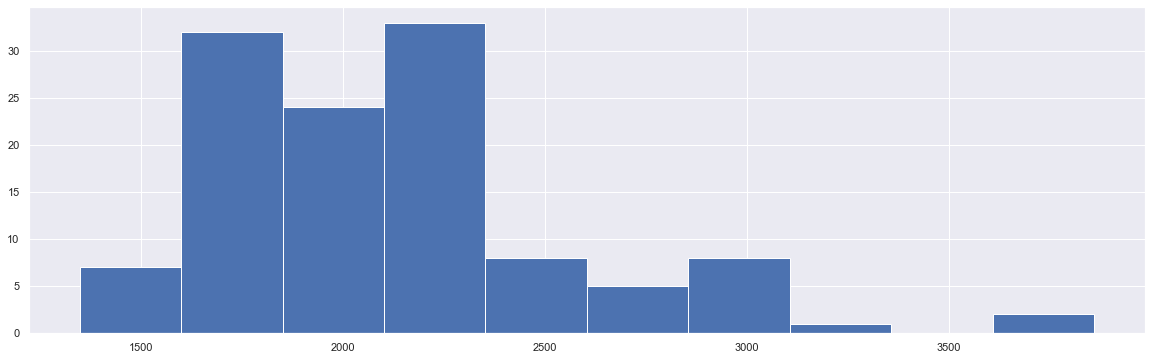

In [22]:
plt.figure(figsize=(20,6))
plt.hist(df["rice"], bins=10)
plt.grid(True)

これでもなんとなく分布は分かりますが， ヒストグラムに用いる階級幅（`hist()`関数における`bins`）を自分で設定した方が分かりやすいこともあります． matplotlibのデフォルトの`hist()`関数はbinsに値の配列を入れることで，自分で階級幅を定義することもできますので，ここでは自分で階級幅を設定してみましょう． まず， そもそも米の消費金額の分布がどのようになっているのかを`describe()`で確認してみます．

In [23]:
df["rice"].describe()

count     120.000
mean     2130.667
std       458.461
min      1349.000
25%      1810.000
50%      2030.000
75%      2305.250
max      3859.000
Name: rice, dtype: float64

最小値が1,349円，最大値が3,859円でしたので，250円ずつくらいで区切ってみます．

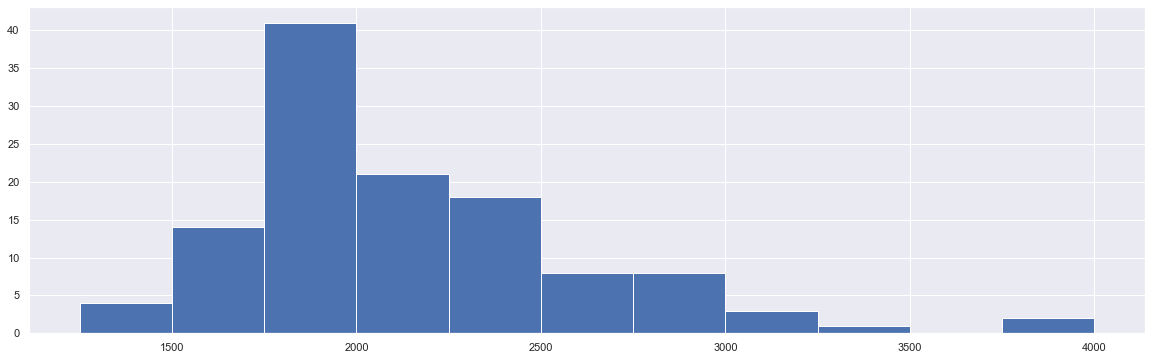

In [24]:
bins = [1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000] 
plt.figure(figsize=(20,6))
plt.hist(df["rice"], bins=bins)
plt.show()

1,750円以上2,000円未満の範囲に入る月が最も多いことが分かりますね．

## 2-2 米とパンの10年間の消費金額の推移を見てみる

さて，次に消費金額が10年間でどのように変わっていったのかをみてみましょう．ここでは，米（`rice`），パン（`bread`），麺類（`noodle`）の主食系に絞って見てみましょう．

先ほどと同様にして，年ごとの総消費量をこの3つの品目について求めてみましょう．

In [25]:
df_carb = df.groupby("year")[["rice", "bread", "noodle"]].sum()
df_carb # df_carb を表示． ちなみに， carb は炭水化物(carbohydrate)の略

,rice,bread,noodle
year,,,
2010,28611,28176,18047
2011,27425,28322,18236
2012,28730,28281,17563
2013,28092,27973,17170
2014,25109,29212,17295
2015,22981,30508,17748
2016,23522,30294,17607
2017,23681,29956,17300
2018,24316,30555,17369


このデータを折れ線グラフで表示してみましょう． 前回同様，matplotlibの`plot()`を用います．

まずは米の消費金額の推移を見てみます． 折れ線グラフを描くには`plot(x, y)`を使えば良いのでした．教科書 ch.2.5.2も参照してください．
x と y のデータを用意します． まず， `y` ですが，  これは `df_carb[rice] としてやれば良いです．

In [26]:
y = df_carb["rice"] # y軸のデータ
y # yを表示

year
2010    28611
2011    27425
2012    28730
2013    28092
2014    25109
2015    22981
2016    23522
2017    23681
2018    24316
2019    23213
Name: rice, dtype: int64

参考: y は `Series`型なので， 支出金額だけではなく インデックス，すなわち`2010`や`2011`といったラベル名もついていますが， matplotlibの`plot()`関数の中では yは支出金額だけの配列として扱われます．

In [27]:
list(y) # yを配列にしたとき（配列にキャストしたとき）の中身． よく分からなければ読み飛ばしてください．

[28611, 27425, 28730, 28092, 25109, 22981, 23522, 23681, 24316, 23213]

次に x ですが， `y`はSeries型で，yのインデックス，すなわち， yearのラベル名がそのままx軸のデータとして使えます． インデックスを取得するには， `y.index`とします．

In [28]:
x = y.index # y のインデックス（つまり， year列のラベル名）を xに代入
x

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype='int64', name='year')

x も matplotlibの`plot()`関数の中では 配列として扱われます．

In [29]:
list(x)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

この x と y を用いて折れ線グラフを書くと，以下の様になります．

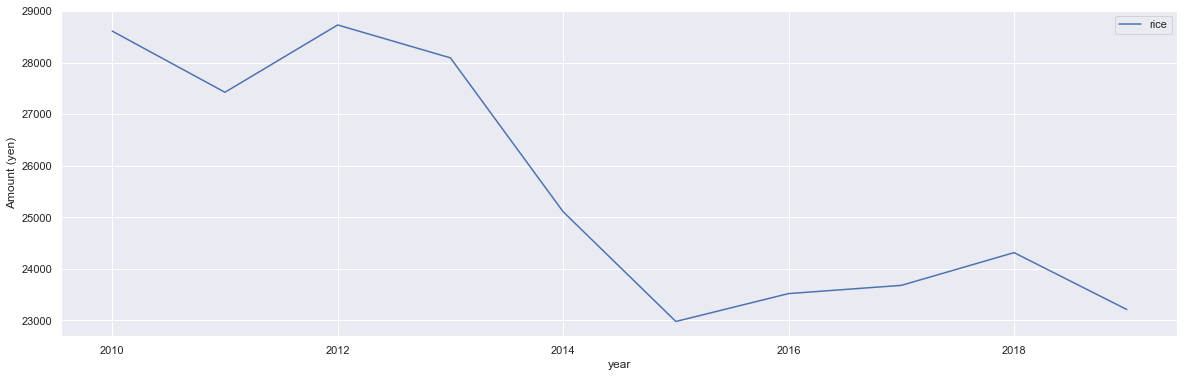

In [30]:
plt.figure(figsize=(20,6))
plt.plot(x, y, label="rice") # 米の消費金額の折れ線グラフを書く ．ラベル名はriceとせよ．
plt.xlabel("year") # x軸の座標名を year とする
plt.ylabel("Amount (yen)") # y軸の座標名を Amount (yen) とする
plt.legend() # 凡例を表示
plt.grid(True)

いまは変数 `x` と `y` を明示的に入力しましたが， 変数 `df_carb` を用いると以下の様に簡単に書けます． コードとしてもこちらの方が分かりやすいと思います．

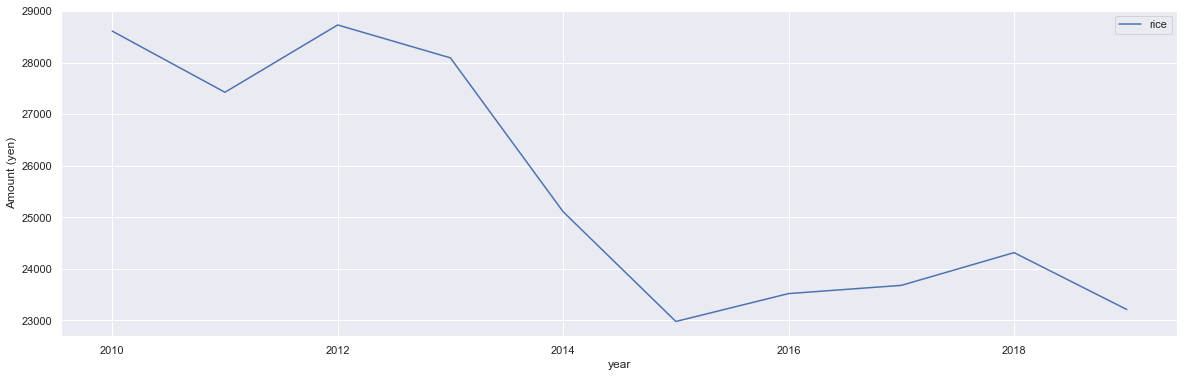

In [31]:
plt.figure(figsize=(20,6))
plt.plot(df_carb.index, df_carb["rice"], label="rice") # 米の消費金額の折れ線グラフを書く ．ラベル名はriceとする．
plt.xlabel("year") # x軸の座標名を year とする
plt.ylabel("Amount (yen)") # y軸の座標名を Amount (yen) とする
plt.legend() # 凡例を表示
plt.grid(True)

さて，　上のコードを参考に，米とパンと麺類のグラフを重ねて書いてみましょう．

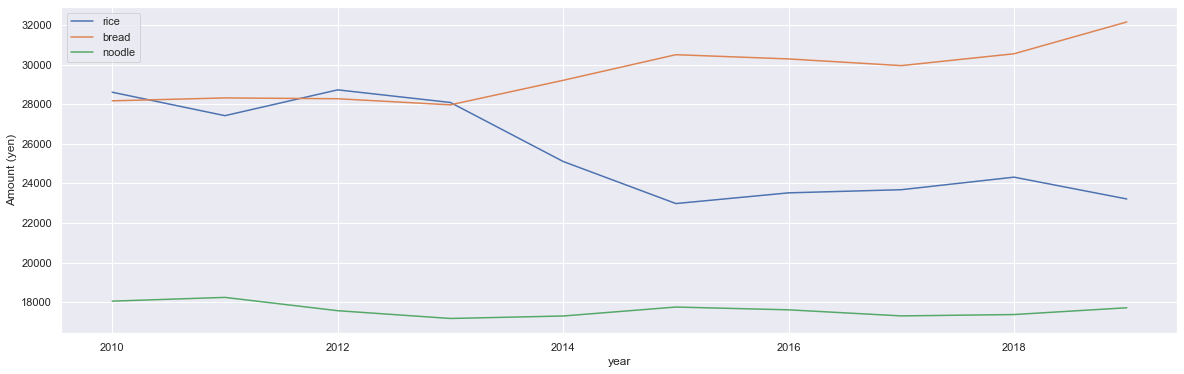

In [32]:
plt.figure(figsize=(20,6))
plt.plot(df_carb.index, df_carb["rice"], label="rice")  # 米の消費金額の折れ線グラフを書く ．ラベル名はriceとせよ．
plt.plot(df_carb.index, df_carb["bread"], label="bread") # パンの消費金額のグラフを書く．ラベル名はbreadとせよ．
plt.plot(df_carb.index, df_carb["noodle"], label="noodle") # 麺類の消費金額のグラフを書く．ラベル名はnoodleとせよ．
plt.xlabel("year")
plt.ylabel("Amount (yen)")
plt.legend()
plt.grid(True)

いま作成した2つの折れ線グラフですが，よく見るとY軸の最小値は0ではないですね．皆さんは気づきましたでしょうか． matplotlibは入力データの範囲に合わせてX軸やY軸の最小値と最大値を設定してくれます．基本的には便利な機能なのですが， 最小値を0に合わせないとデータの解釈を間違える可能性もあります． X軸やY軸の最小値や最大値を設定するには，`xlim()`や`ylim()`を使います．たとえば， Y軸の範囲を [0, 40000] にするには `plt.ylim(0, 40000)` のようにします． 以下のコードを実行してください．

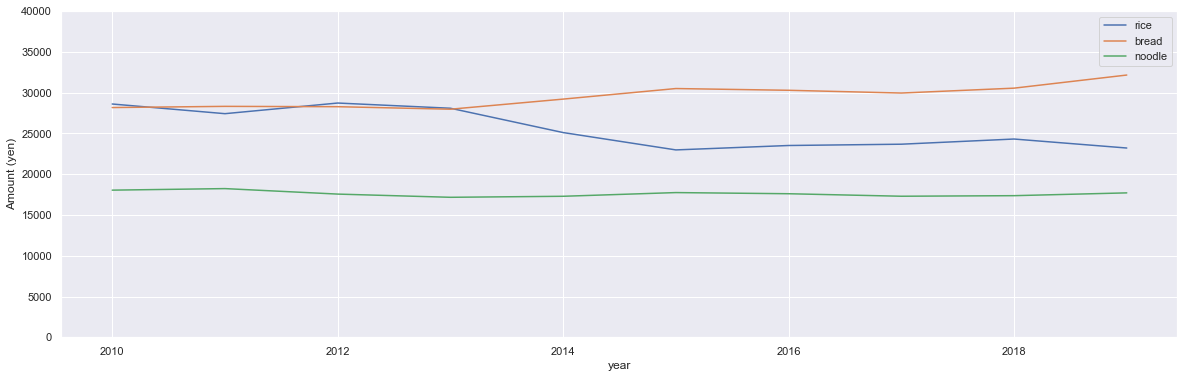

In [33]:
plt.figure(figsize=(20,6))
plt.plot(df_carb.index, df_carb["rice"], label="rice")  # 米の消費金額の折れ線グラフを書く 
plt.plot(df_carb.index, df_carb["bread"], label="bread") # パンの消費金額のグラフを書く
plt.plot(df_carb.index, df_carb["noodle"], label="noodle") # 麺類の消費金額のグラフを書く
plt.xlabel("year")
plt.ylabel("Amount (yen)")
plt.ylim(0, 40000) # Y軸の範囲を 0　から 40,000 にする
plt.legend()
plt.grid(True)

`plt.ylim(0, 40000)` のようにコードに範囲を直接設定してしまうと，データを変えるとまたコードを修正する必要があります． `df_curb.max()` で各品目の最大値がとれ，更に `df_curb.max().max()` とすることで， 各列の最大値の最大値を求めることができます．

In [34]:
df_carb.max() # 各列の最大値を求める

rice      28730
bread     32163
noodle    18236
dtype: int64

In [35]:
df_carb.max().max() # 各列の最大値の最大値をとる（つまり，全要素の最大値）

32163

これを用いると， データから自動的にY軸の最大値を設定できますね．

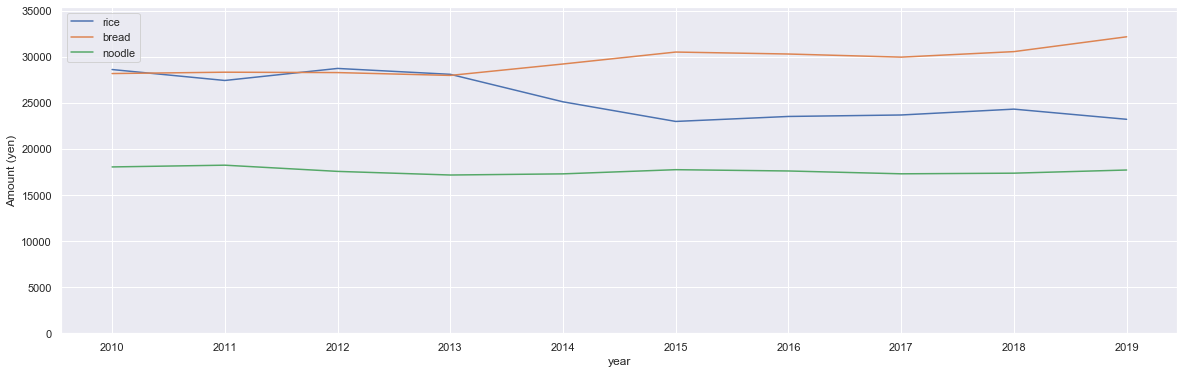

In [36]:
plt.figure(figsize=(20,6))
plt.plot(df_carb["rice"], label="rice")  # 米の消費金額の折れ線グラフを書く 
plt.plot(df_carb["bread"], label="bread") # パンの消費金額のグラフを書く
plt.plot(df_carb["noodle"], label="noodle") # 麺類の消費金額のグラフを書く
plt.xlabel("year")
plt.ylabel("Amount (yen)")
plt.ylim(0, df_carb.max().max()* 1.1) # Y軸の範囲を 0　からデータの最大値の1.1倍にする
plt.xticks(df_carb.index)
plt.legend()
plt.grid(True)

さて，グラフを見ると，ここ10年でパンの消費金額は増加している一方，米の消費金額は減少していることがわかりますね． 日本人の米離れという話をよく聞きますが，このように消費金額のデータからもその傾向が読み取れます． また，麺類については10年間での変化はあまりなさそうです．
 - 2014年と2015年の米の消費金額の落ち込みの原因はなんなのでしょうか？考えてみると面白そうですね．

なお，いまはこのグラフを書くために matplotlibの`plot()`関数を利用しましたが， pandasのDataFrameにも`plot()`関数があり，そちらを利用することもできます． 今一度 df_carb の中身を表示してみます．

In [37]:
df_carb

,rice,bread,noodle
year,,,
2010,28611,28176,18047
2011,27425,28322,18236
2012,28730,28281,17563
2013,28092,27973,17170
2014,25109,29212,17295
2015,22981,30508,17748
2016,23522,30294,17607
2017,23681,29956,17300
2018,24316,30555,17369


pandasのDataFrameの`plot()`関数を呼ぶのは以下の様にします．

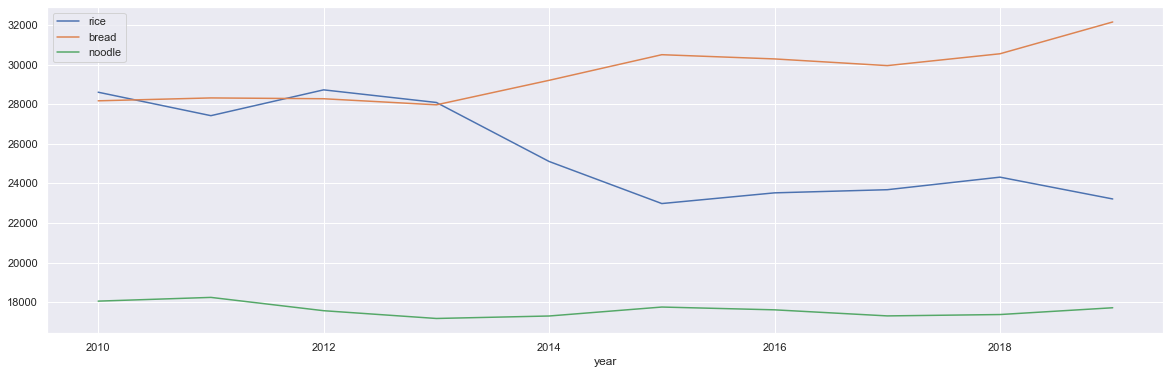

In [38]:
df_carb.plot(figsize=(20,6)) # figsize=(20,6) はなくても描画できる． いままでと同様グラフの大きさの設定をするための引数

何も設定していなくとも， 各系列の凡例（`rice`，`bread`，`noodle`）が付いていたり，x軸に座標名（`year`）が設定されているのが分かるかと思います．pandasの`plot()`関数も中身はmatplotlibを使っています．pandasの方の`plot()`関数を使うと，色々と必要そうな初期設定をDataFrameの中身に応じてデフォルトでやってくれるので，matplotlibを直接使うよりもコードが簡潔に書けます
- このような感じで，pandasやmatplotlibを使った分析は，同じことをするための方法がさまざまあります．自分にとって分かりやすい方法で書くことができれば十分です．この演習資料では，教科書に合わせて，できる限りmatplotlibを直接用いるコードを書きます．

 いま表示した図を少し見た目を整形して，ファイルに保存してみます． 見た目の整形に関しては参考程度にみておけば十分です．重要な関数としては`savefig()`で，  `savefig(ファイル名) ` で画像をマシン上に保存することができます． 画像の種類は拡張子（`.png`，`.pdf`，`.jpg`など）を変えると自動的にその拡張子の形式で保存してくれます．

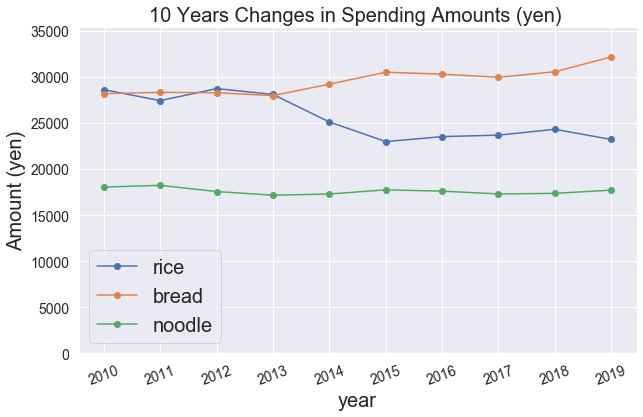

In [39]:
plt.figure(figsize=(10,6))
plt.plot(df_carb.index, df_carb["rice"], "o-", label="rice") #oで点を○で表示する． - で点間を直線で結ぶ
plt.plot(df_carb.index, df_carb["bread"], "o-", label="bread")
plt.plot(df_carb.index, df_carb["noodle"], "o-", label="noodle")
plt.xlabel("year", fontsize=20) # fontsizeで文字の大きさを設定する
plt.ylabel("Amount (yen)", fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(df_carb.index, fontsize=14, rotation=20) #ラベルを全て表示する．ラベルを20度傾けて表示してみる
plt.ylim(0, df_carb.max().max()* 1.1) # Y軸の範囲を 0　からデータの最大値の1.1倍にする
plt.title("10 Years Changes in Spending Amounts (yen) ", fontsize=20) # 図のタイトル
plt.legend(fontsize=20)
plt.savefig("10years.png") # PNG形式で画像を10year.pngというファイル名で保存する
plt.grid(True)

上記セルの実行後，みなさんの手元のPCにある演習課題のリポジトリのフォルダに `10year.png`というファイルが作成されているはずです．

補足:  今回は1つのグラフに複数の折れ線を重ねて描画しました． `df_carb`のそれぞれの品目ごとに1つのグラフを書く方法として， for 文でぐるぐる回す方法もあります． `plt.show()` は　図を明示的に表示するためのコマンドです（今まではJupyerがセルの最後にある `plt.grid(True)` の結果を解釈して勝手に図を表示してくれていた）

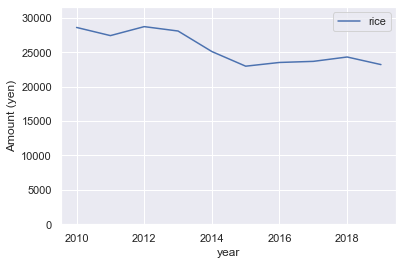

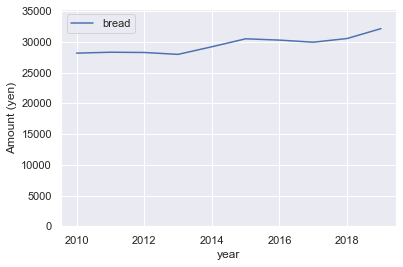

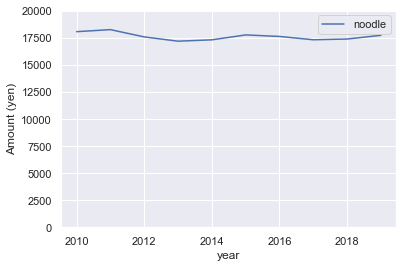

In [40]:
carbs = ["rice", "bread", "noodle"]
for item in carbs:
    plt.plot(df_carb.index, df_carb[item], label=item)
    plt.xlabel("year")
    plt.ylabel("Amount (yen)")
    plt.ylim(0, df_carb[item].max() * 1.1)
    plt.legend()
    plt.grid(True)
    plt.show()  #明示的に図を描画する

## 2-3 品目間の消費金額の相関を確認する

最後に，散布図についても使ってみましょう． ここでは キャンデーとアイスクリーム・シャーベットの毎月の消費金額の散布図を作成してみます．直感的には，アイスクリームは暑い時期の方が売れますし，キャンデーは暑い時期はあまり売れなさそうで，この2つの品目の毎月の消費金額には`負の相関`がありそうです． 実際に散布図を描いて確認してみましょう．

変数 `df` に何が入っているのかを今一度表示しておきます．

In [41]:
df

,year,month,rice,bread,noodle,fish_faw,fish_salt,fish_processed,beef,pork,...,castella,cake,jelly,pudding,senbei,biscuit,snack,candy,chocolate,icecream
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,2010,1,1815,2255,1369,3992,1140,718,1579,2002,...,82,610,56,125,449,229,320,205,456,362
2010-02-01,2010,2,1980,2231,1281,3720,1089,660,1361,1943,...,63,545,69,123,411,239,317,191,1122,305
2010-03-01,2010,3,2248,2518,1447,4139,1275,701,1517,2009,...,86,657,98,138,509,396,364,214,409,383
2010-04-01,2010,4,2259,2468,1364,3818,1181,662,1462,1923,...,81,522,127,132,466,261,358,199,287,464
2010-05-01,2010,5,2282,2507,1504,3973,1218,660,1575,1977,...,90,551,182,139,446,271,360,195,233,752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,2019,8,1756,2657,1656,3219,1070,590,1853,2335,...,72,429,424,139,539,379,420,161,278,1513
2019-09-01,2019,9,2335,2552,1339,3160,1032,599,1560,2438,...,56,489,173,122,424,323,385,157,374,996
2019-10-01,2019,10,2944,2650,1446,3233,1056,688,1522,2555,...,58,508,114,130,434,307,397,190,478,724


それでは，この　`df`　を使って，キャンデーとアイスクリームの毎月の消費金額の散布図を作成しましょう．最後はセルを全部空にしますので，各自で考えて散布図を書いてみましょう．そのとき，散布図が以下の仕様を満たすようにしてください．

- x軸をキャンデーの毎月の消費量とせよ
- y軸をアイスクリームの毎月の消費量とせよ
- x軸の座標名を `candy` とせよ
- y軸の座標名を `icecream` とせよ
- 作成した図を `scatter.png`　というファイル名で演習課題のリポジトリのフォルダに保存せよ．

ヒント: 散布図も `plt.plot()` を使って書けるのでしたね．

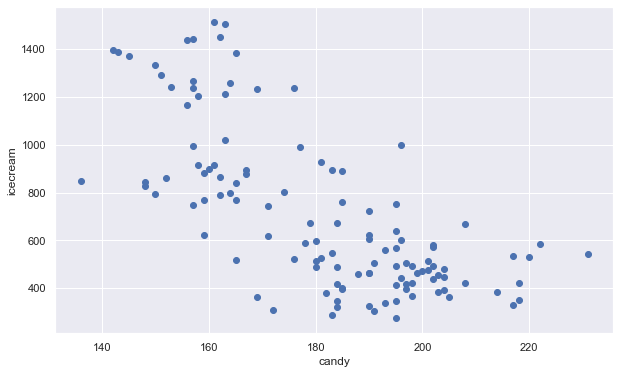

In [42]:
plt.figure(figsize=(10,6))
plt.plot(df["candy"], df["icecream"], "o")
plt.xlabel("candy")
plt.ylabel("icecream")
plt.savefig("scatter.png")
plt.grid(True)

細部の見え方は違うかもしれませんが，下記の様な図が表示され，それが`scatter.png`というファイル名で演習課題のリポジトリのフォルダに作成されていればOKです．

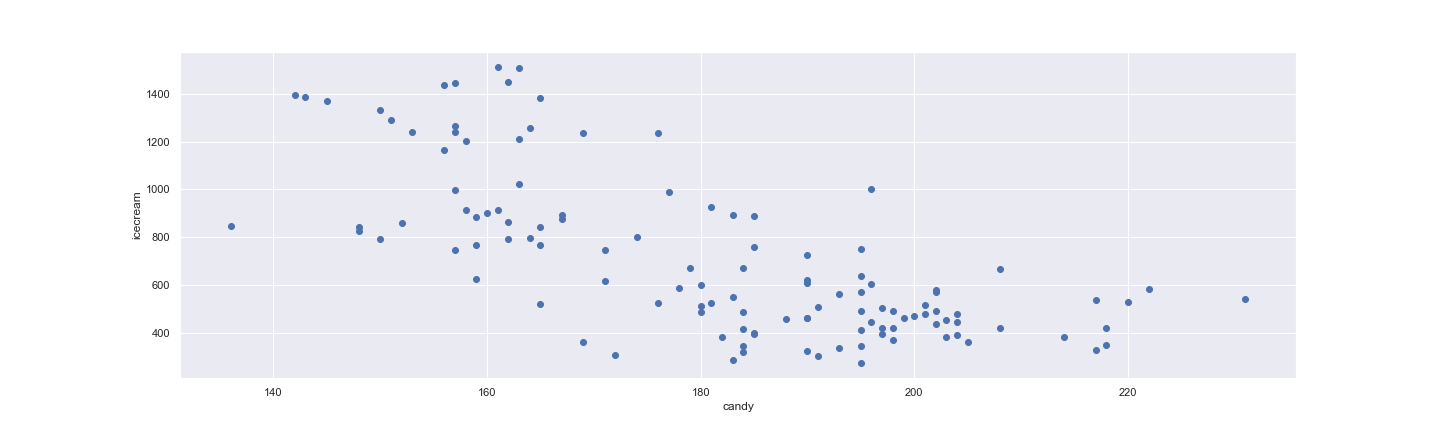

やはり負の相関が散布図から見えますね．念のための相関係数についても計算してみると，

In [43]:
import scipy as sp
sp.stats.pearsonr(df["candy"], df["icecream"])[0] # キャンデーとアイスクリームの消費金額のピアソンの積率相関係数を計算する

-0.7116516707703744

となり， 負となっていることが分かります．

これで今週の演習課題は終わりです． 実際のデータでpandasやmatplotlibを用いてみました． こうしたライブラリを使って分析する雰囲気が分かってもらえれば十分です．レポートその3では今回のデータに対して各自でいろいろと分析してもらいます． この演習資料の内容や教科書を何度も見返すと思いますが，ちょっとづつ慣れていきましょう．